Data model for preidicting TSLA (NASDAQ)

Dataset link: https://finance.yahoo.com/quote/TSLA/history/?period1=1277818200&period2=1717450065

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential # network API for training models
from tensorflow.keras.layers import Dense, LSTM # Long Short Term Memory layers

In [18]:
# Load the dataset

df = pd.read_csv('../datasets/TSLA.CSV')

In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3501,2024-05-28,176.399994,178.250000,173.160004,176.750000,176.750000,59736600
3502,2024-05-29,174.190002,178.149994,173.929993,176.190002,176.190002,54782600
3503,2024-05-30,178.580002,182.669998,175.380005,178.789993,178.789993,77784800
3504,2024-05-31,178.500000,180.320007,173.820007,178.080002,178.080002,67209500


In [20]:
# Index by date 
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

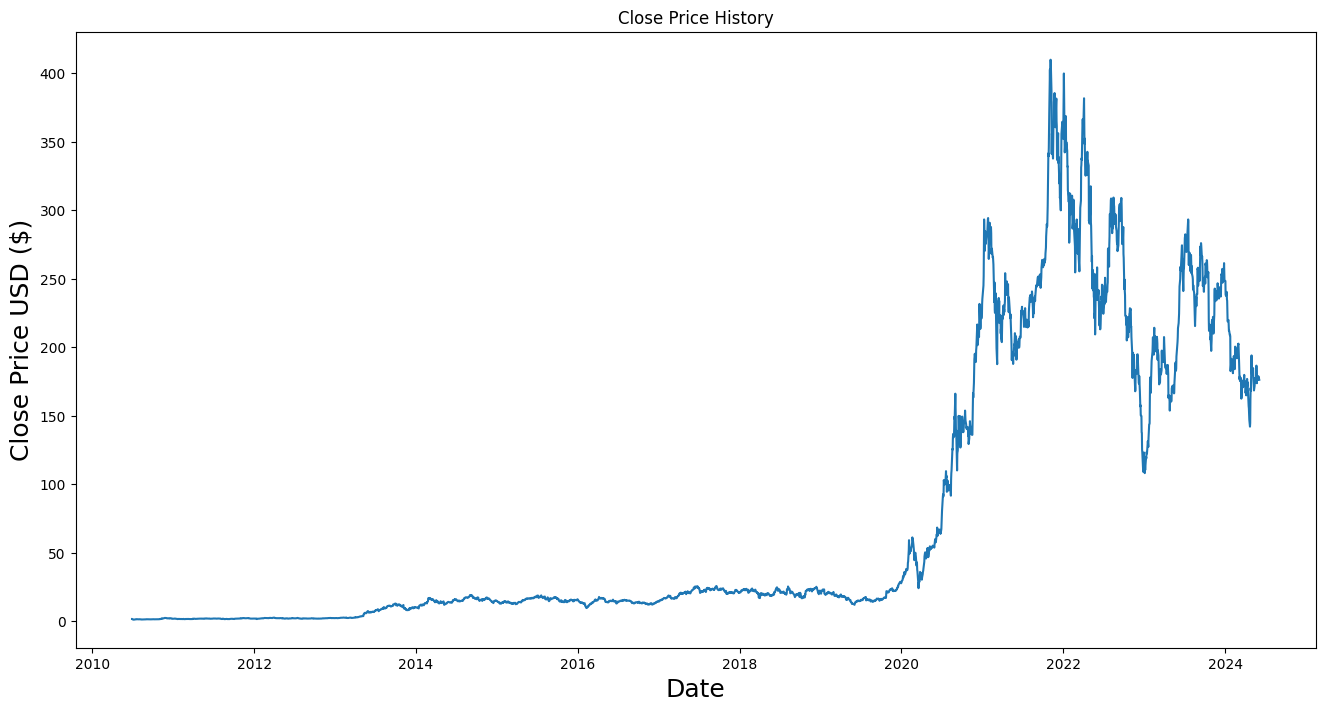

In [21]:
# Grab the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [22]:
# final dataset contains only the 'Close' column

data = df.filter(['Close'])
dataset = data.values

In [23]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1)) # normalize data
scaled_data = scaler.fit_transform(dataset)

In [24]:
# Training and testing datasets

training_data_len = int( len(dataset) * .95 )
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60: , :]

In [25]:
# Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [26]:
# Setup the LSTM Model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

c:\Users\derek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') 

In [28]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10) # 1 epoch is one forward pass and one backward pass of all the training examples

Epoch 1/10
3270/3270 ━━━━━━━━━━━━━━━━━━━━ 47s 13ms/step - loss: 0.0025
Epoch 2/10
3270/3270 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - loss: 7.1501e-04
Epoch 3/10
3270/3270 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - loss: 4.3273e-04
Epoch 4/10
3270/3270 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - loss: 3.7774e-04
Epoch 5/10
3270/3270 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 3.5209e-04
Epoch 6/10
3270/3270 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 3.3449e-04
Epoch 7/10
3270/3270 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - loss: 3.7117e-04
Epoch 8/10
3270/3270 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - loss: 2.9956e-04
Epoch 9/10
3270/3270 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - loss: 3.3137e-04
Epoch 10/10
3270/3270 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - loss: 2.7988e-04


In [29]:
# Prepare the testing data 
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
# Predict future prices

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


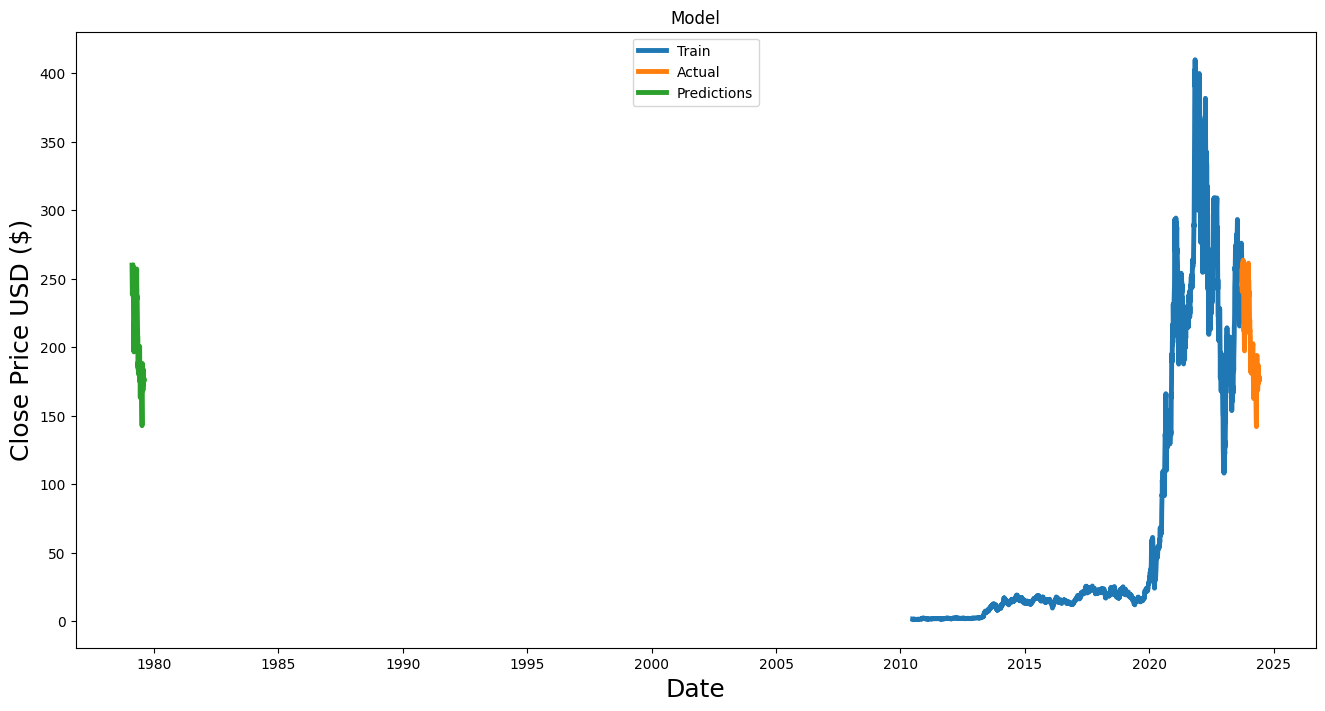

In [31]:
# Make a visual for the predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['Close'][:training_data_len], linewidth = 3.5)
plt.plot(data['Close'][training_data_len+60:], linewidth = 3.5)
plt.plot(range(training_data_len, len(data)), predictions, linewidth = 3.5)
plt.legend(['Train', 'Actual', 'Predictions'], loc='upper center')
plt.show()

In [32]:
# Print the predicted prices
print(predictions[-1])

[176.58994]
